In [1]:
import evautils
import os
from evautils import benchmarkingcontroller
from evautils import dirutils
from evautils import match_gc_content
from evautils import fasta_to_bed
from evautils import osutils
from evautils import sequtils

In [2]:
CELL_LINE = 'H1ESC'
REGION_SIZE = 400
POS_PREFIX = CELL_LINE +'_' + str(REGION_SIZE)
NEG_PREFIX = 'universal_dnase_' + str(REGION_SIZE)
MASTER_DIR='/users/eprakash/benchmarking/H1ESC'
BASE_DIR = MASTER_DIR+'/400bp_hg38'
POS_NARROW_PEAKS = '/users/eprakash/projects/benchmarking/newdata/H1ESC/optimal_peak.narrowPeak.gz'
GENOME_FILE = '/users/eprakash/benchmarking/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta'
NEG_BED_FILE = '/users/eprakash/projects/benchmarking/newdata/H1ESC/universal_dnase_narrowPeaks_bedfile_400bp.gz'

In [3]:
#dirutils.createDir(MASTER_DIR)
#dirutils.createDir(BASE_DIR)

In [4]:
dirutils.copyFileToWorkingDir(POS_NARROW_PEAKS, BASE_DIR)
dirutils.copyFileToWorkingDir(NEG_BED_FILE, BASE_DIR)
#dirutils.copyFileToWorkingDir(GENOME_FILE, BASE_DIR)

In [5]:
POS_NARROW_PEAKS=BASE_DIR + '/' + dirutils.getFileNameFromPath(POS_NARROW_PEAKS)
#GENOME_FILE=BASE_DIR + '/' + dirutils.getFileNameFromPath(GENOME_FILE)
NEG_BED_FILE = BASE_DIR + '/' + dirutils.getFileNameFromPath(NEG_BED_FILE)

In [6]:
posBedFile = BASE_DIR + '/' + POS_PREFIX + '.bed'
benchmarkingcontroller.narrowPeaksToBed(POS_NARROW_PEAKS, REGION_SIZE, posBedFile)

In [7]:
noPosNegBedFile = BASE_DIR + '/' + 'no_' + CELL_LINE + '_' + NEG_PREFIX + '.bed'
benchmarkingcontroller.getExclusiveSets(posBedFile + '.gz', NEG_BED_FILE, noPosNegBedFile)

In [8]:
posFastaFile = BASE_DIR + '/' + POS_PREFIX + '.fa'
benchmarkingcontroller.getFasta(GENOME_FILE, posBedFile, posFastaFile)

In [9]:
negFastaFile = BASE_DIR + '/' + NEG_PREFIX + '.fa'
benchmarkingcontroller.getFasta(GENOME_FILE, noPosNegBedFile, negFastaFile)

#Loading /users/eprakash/benchmarking/H1ESC/400bp_hg38/H1ESC_400.fa ...
#Loaded 96663 sequences from /users/eprakash/benchmarking/H1ESC/400bp_hg38/H1ESC_400.fa
#Loading /users/eprakash/benchmarking/H1ESC/400bp_hg38/universal_dnase_400.fa ...
#Loaded 1045470 sequences from /users/eprakash/benchmarking/H1ESC/400bp_hg38/universal_dnase_400.fa


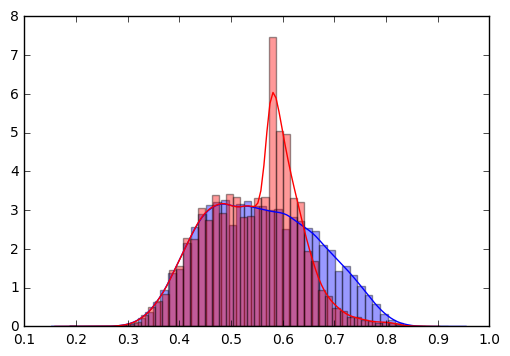

In [ ]:
matchedNegFastaFile = BASE_DIR + '/' + 'matched_' + 'no_' + CELL_LINE + '_' + NEG_PREFIX + '.fa'
match_gc_content.match_gc_content(posFastaFile, negFastaFile, matchedNegFastaFile)

In [ ]:
posMotifDir = BASE_DIR + '/' + POS_PREFIX + '_motifs'
benchmarkingcontroller.runHomer(posFastaFile, matchedNegFastaFile, posMotifDir)


Selected Options:
Input file = /users/eprakash/benchmarking/H1ESC/400bp_hg38/H1ESC_400.fa
Promoter Set = fasta
Output Directory = /users/eprakash/benchmarking/H1ESC/400bp_hg38/H1ESC_400_motifs
Will use FASTA files for motif finding
Target Sequences = /users/eprakash/benchmarking/H1ESC/400bp_hg38/H1ESC_400.fa
Background Sequences = /users/eprakash/benchmarking/H1ESC/400bp_hg38/matched_no_H1ESC_universal_dnase_400.fa
Parsing FASTA format files...
Found 96663 sequences
Found 96663 sequences

Progress: Step4 - removing redundant promoters

Progress: Step5 - adjusting background sequences for GC/CpG content...

Sequences processed:
Auto detected maximum sequence length of 400 bp
100000
193326 total

Frequency Bins: 0.2 0.25 0.3 0.35 0.4 0.45 0.5 0.6 0.7 0.8
Freq	Bin	Count
0.2	0	3
0.25	1	29
0.3	2	128
0.35	3	2002
0.4	4	9962
0.45	5	22801
0.5	6	30147
0.6	7	68348
0.7	8	46377
0.8	9	12631
10	10	898
Bin	# Targets	# Background	Background Weight
0	1	2	0.500
1	15	14	1.071
2	64	64	1.000
3	1001	1001	1.

In [ ]:
posMotifMatches = BASE_DIR + '/' + POS_PREFIX + '_motif_matches.txt'
benchmarkingcontroller.scanMotifGenomeWide(posMotifDir+'/homerMotifs.all.motifs', posFastaFile, posMotifMatches)

In [ ]:
implantedPosFastaFile = BASE_DIR + '/' + 'implanted_' + POS_PREFIX + '.fa'
benchmarkingcontroller.shuffle_seqs_and_implant_motifs(posFastaFile, posMotifMatches, implantedPosFastaFile)

In [ ]:
implantedPosBedFile = BASE_DIR + '/' + 'implanted_' + POS_PREFIX + '.bed'
fasta_to_bed.convert(implantedPosFastaFile, implantedPosBedFile)

In [ ]:
matchedNegBedFile = BASE_DIR + '/' + 'matched_' + 'no_' + CELL_LINE + '_' + NEG_PREFIX + '.bed'
fasta_to_bed.convert(matchedNegFastaFile, matchedNegBedFile)

In [ ]:
os.system('gzip ' + implantedPosBedFile)
os.system('gzip ' + matchedNegBedFile)